In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Indian_Housing_Pune_data.csv')
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   house_type        3910 non-null   object 
 1   house_size        3910 non-null   object 
 2   location          3910 non-null   object 
 3   city              3910 non-null   object 
 4   latitude          3910 non-null   float64
 5   longitude         3910 non-null   float64
 6   price             3910 non-null   int64  
 7   currency          3910 non-null   object 
 8   numBathrooms      3893 non-null   float64
 9   numBalconies      1821 non-null   float64
 10  isNegotiable      526 non-null    object 
 11  priceSqFt         0 non-null      float64
 12  verificationDate  3910 non-null   object 
 13  description       3442 non-null   object 
 14  SecurityDeposit   3910 non-null   object 
 15  Status            3910 non-null   object 
dtypes: float64(5), int64(1), object(10)
memory

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
0,2 BHK Apartment,906 sq ft,Lohegaon,Pune,18.605820,73.912407,12000,INR,2.0,NaN,NaN,NaN,Posted 3 years ago,A spacious 2 bhk multistorey apartment is avai...,No Deposit,Unfurnished
1,1 BHK Apartment,650 sq ft,Anand Nagar,Pune,18.474377,73.820549,11000,INR,1.0,NaN,NaN,NaN,Posted 2 years ago,It has a built-up area of 650 sqft and is avai...,No Deposit,Semi-Furnished
2,1 RK Studio Apartment,350 sq ft,Wagholi,Pune,18.580336,73.980507,4500,INR,1.0,NaN,NaN,NaN,Posted 2 years ago,This spacious 1 rk independent house is availa...,No Deposit,Unfurnished
3,3 BHK Apartment,"1,500 sq ft",Sangamvadi,Pune,18.541786,73.882454,35000,INR,2.0,NaN,NaN,NaN,Posted 3 years ago,"Furnishings include 1 tv, 1 refrigerator, 1 so...",No Deposit,Furnished
4,5 BHK Independent House,"5,000 sq ft",Wadgaon Sheri,Pune,18.560164,73.924927,110000,INR,5.0,NaN,NaN,NaN,Posted 3 years ago,Itâs a 5 bhk independent house situated in W...,No Deposit,Unfurnished


In [3]:
dataset.isnull().sum()

house_type             0
house_size             0
location               0
city                   0
latitude               0
longitude              0
price                  0
currency               0
numBathrooms          17
numBalconies        2089
isNegotiable        3384
priceSqFt           3910
verificationDate       0
description          468
SecurityDeposit        0
Status                 0
dtype: int64

In [4]:
dataset.drop(['location', 'city','latitude','longitude','verificationDate','currency','priceSqFt', 'description', 'SecurityDeposit', 'isNegotiable', 'numBalconies','Status'], axis=1, inplace=True)

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Take the relevant columns
X = dataset[['house_type', 'house_size', 'numBathrooms']]
y = dataset['price']

# Handle categorical data in 'house_type' and 'house_size'
# Label Encoding for 'house_type'
label_encoder = LabelEncoder()
X['house_type'] = label_encoder.fit_transform(X['house_type'])

# One Hot Encoding for 'house_size'
# We use ColumnTransformer to apply OneHotEncoder to 'house_size' column
ct = ColumnTransformer([('house_size', OneHotEncoder(), ['house_size'])], remainder='passthrough')
X = ct.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Print the shapes of the resulting arrays
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (3128, 683)
X_test shape: (782, 683)
y_train shape: (3128,)
y_test shape: (782,)


C:\Users\jigna\AppData\Local\Temp\ipykernel_15576\4210621404.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['house_type'] = label_encoder.fit_transform(X['house_type'])


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'dataset' is your DataFrame after dropping the unnecessary columns
# dataset = pd.read_csv('path_to_your_dataset.csv')  # Uncomment if you need to load the dataset

# Select the relevant columns
X = dataset[['house_type', 'house_size', 'numBathrooms']].copy()
y = dataset['price']

# Handle categorical data in 'house_type' and 'house_size'
# Label Encoding for 'house_type'
label_encoder = LabelEncoder()
X['house_type'] = label_encoder.fit_transform(X['house_type'])

# Imputer for missing values
imputer = SimpleImputer(strategy='most_frequent')

# Apply imputer to numerical columns
X['numBathrooms'] = imputer.fit_transform(X[['numBathrooms']])

# One Hot Encoding for 'house_size'
onehot_encoder = OneHotEncoder()
house_size_encoded = onehot_encoder.fit_transform(X[['house_size']])

# Combine the encoded 'house_size' with other features
X = X.drop('house_size', axis=1)
X_encoded = pd.concat([X.reset_index(drop=True), 
                       pd.DataFrame(house_size_encoded.toarray(), columns=onehot_encoder.get_feature_names_out(['house_size']))], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 2.8544005813016677e+29
R^2 Score: -1.1084946598258669e+21


C:\Users\jigna\AppData\Local\Temp\ipykernel_15576\1249376338.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.price)


<Axes: title={'center': 'House Price Distribution Plot'}, xlabel='price', ylabel='Density'>

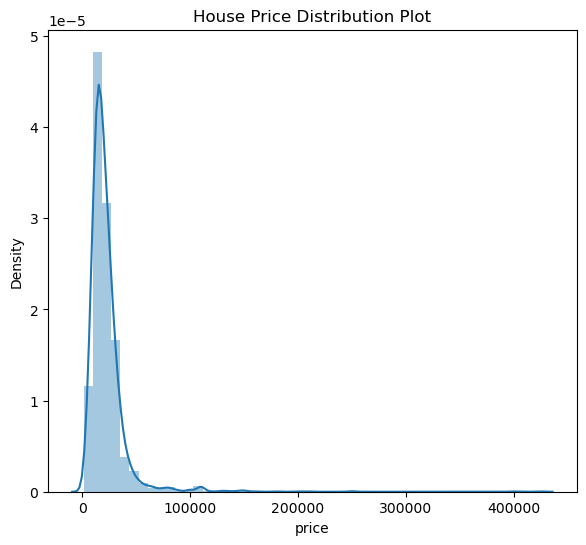

In [22]:
import seaborn as sns

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('House Price Distribution Plot')
sns.distplot(dataset.price) 